# Constrained Minimization



In this problem, we have an inverse demand function, and we want to maximize revenue subject to the condition that profit $\pi$ is at least $\pi_{\min}$.

In [22]:
import numpy as np
import scipy.optimize as opt
π_min = 0.3
P = lambda x: 3 - 2.5*x
TR = lambda x: P(x)*x
c = .2 #marginal cost/variable cost per ride
C = lambda x: c*x
π = lambda x: TR(x) - C(x)


def fun(x):
    x = x[0]
    return np.array([
        π(x)- π_min
    ])

constraints = {'type': 'ineq', 'fun': fun}
res = opt.minimize(lambda x: -TR(x[0]), x0=(1.0), constraints=constraints, bounds=((0,None),))
xstar = res.x[0]
print("The optimal values are x={:.2f}, P={:.2f}, pi={:.2f}, TR={:.2f}".format(xstar,P(xstar),π(xstar),TR(xstar)))

The optimal values are x=0.60, P=1.50, pi=0.78, TR=0.90


In this case, the revenue-maximizing value of $x$ also satisfies the minimum profit constraint. We can see this graphically below.

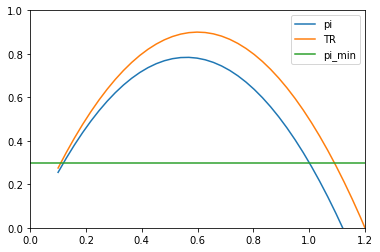

In [23]:
import matplotlib.pyplot as plt
xs = np.linspace(.1,3,100)
πs = π(xs)
TRs = TR(xs)
plt.plot(xs,πs,label="pi")
plt.plot(xs,TRs,label="TR")
plt.plot([0,1.2],[π_min,π_min],label="pi_min")
plt.ylim(0,1)
plt.xlim(0,1.2)
plt.legend()

However, suppose that marginal cost $c$ is higher.

In [24]:
c = 1.2#new marginal cost
res = opt.minimize(lambda x: -TR(x[0]), x0=(1.0), constraints=constraints, bounds=((0,None),)) #recalculating
xstar = res.x[0]
print("The optimal values are x={:.2f}, P={:.2f}, pi={:.2f}, TR={:.2f}".format(xstar,P(xstar),π(xstar),TR(xstar)))

The optimal values are x=0.46, P=1.86, pi=0.30, TR=0.85


You see that profit is exactly 0.3, so the profit constraint binds. You cannot achieve the highest-possible revenue.

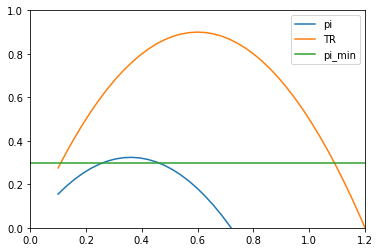

In [26]:
import matplotlib.pyplot as plt
xs = np.linspace(.1,3,100)
πs = π(xs)
TRs = TR(xs)
plt.plot(xs,πs,label="pi")
plt.plot(xs,TRs,label="TR")
plt.plot([0,1.2],[π_min,π_min],label="pi_min")
plt.ylim(0,1)
plt.xlim(0,1.2)
plt.legend()